# Incumplimientos de pago en tarjetas de credito de Taiwan en 2005

## Breve explicación de la elección del dataset: características, número de atributos y  variables, área al que pertenecen los datos. 

La base de datos a utilizar será acerca de los pagos por defecto de los clientes en Taiwán de su tarjeta de crédito donde se busca ver su probabilidad de incumplimiento e identificar clientes creíbles y no creíbles, todo esto bajo el panorama de la crisis de creditos de Taiwan del 2005. “incumplimiento de los clientes de tarjetas de crédito” o su nombre en inglés: “default of credit card clients Data Set” cuenta con 24 atributos, 30,000 instancias y pertenece al área de negocios.

Se encuentra un histórico de registros desde abril hasta septiembre del 2005. Y solamente se concluyó tomar el mes de septiembre, por ende, se puede decir que esta base de datos filtrada tiene 10 variables categóricas y 14 numéricas.

La base cuenta con datos faltantes y malas digitaciones. Con el fin de un analisis mas llevadero, se usa el esquema de "Datos disponibles" removiendo estos mismos.

### Variables cualitativas: 

- SEX: Género (1 = masculino; 2 = femenino).
- EDUCATION: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
- MARRIAGE: Estado civil (1 = casado; 2 = soltero; 3 = otros).
- PAY_0-PAY_6: Pago mensual de septiembre-abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
- DEFAULT PAYMENT NEXT MONTH: 1 hay un incumplimiento de pago para octubre de 2005. 0 quiere decir que no está incumpliendo.


### Variables cuantitativas:

- AGE: Edad (años).
- LIMIT_BAL: Monto del crédito otorgado (Nuevo dólar taiwanés): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
- BILL_AMT1-BILL_AMT6: Importe del estado de cuenta (Nuevo dólar taiwanés). Monto del estado de cuenta en septiembre-abril de 2005.
- PAY_AMT1-PAY_AMT6: Monto del pago anterior (Nuevo dólar taiwanés). Monto pagado en septiembre-abril de 2005


## Escenario mineria de datos

El fin de la base es el poder seleccionar individuos para saber si es viable entregarles entergarles una tarjeta de credito con un "cupo" alto. Para ello, se desea entrenar a la IA es un ambiente supervisado para obetenr los resultados mas optimos. Los creadores originales de la base recomendaban redes neuronales para la realización de este fin, pero una tarea de Clasificación sencilla tambien es viable dentro de este contexto.

# Analisis descriptivo base 

## Base y librerias


In [1]:
!pip install xlrd==1.2.0
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel(r"/content/tarjeta_credito.xls")

In [ ]:
df = df.drop(['ID'], axis = 1)

In [ ]:
df=df.query('EDUCATION != [0,5,6] & MARRIAGE != [0] & BILL_AMT1 >= 0')

In [ ]:
df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29994      80000    1          2         2   34      2      2      2      2   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29994      2  ...      77519      82607      81158      7000      3500   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29994         0      7000         0      4000                           1  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29999      1430      1000      1000      1000                           1  

[29013 rows x 24 columns]

## Descripcion general

In [ ]:
df['SEX'].value_counts() #Género (1 = masculino; 2 = femenino).

2    17498
1    11515
Name: SEX, dtype: int64

Para el reporte de los pagos por defecto de los clientes en Taiwán de su tarjeta de crédito el 60.31% son mujeres y el 39.69% son hombres.

In [ ]:
df.groupby("SEX")["default payment next month"].sum() #Género (1 = masculino; 2 = femenino).

SEX
1    2819
2    3677
Name: default payment next month, dtype: int64

In [ ]:
(2819/11515)*100

24.481111593573598

In [ ]:
 (3677/17498)*100

21.013830152017373

### Proporción de hombres y mujeres que se encuentran en riesgo de incurrir en "Default"


| Hombres  |  Mujeres |
|:-:|:-:|
|  24.48% | 21.01%  |

De acuerdo a la proporción hay un mayor porcentaje de incumplimiento en el grupo de los hombres que el de las mujeres siendo igual a 24.48%

In [ ]:
df['EDUCATION'].value_counts()

2    13809
1    10297
3     4791
4      116
Name: EDUCATION, dtype: int64

Se encontró la correspondiente clasificacion por nivel educativo de los individuos: 
- Posgrado = 10.297 
- Universidad = 13.809
- Secundaria = 4.791
- Otros = 116

In [ ]:
df.groupby("EDUCATION")["default payment next month"].sum()

EDUCATION
1    1982
2    3288
3    1219
4       7
Name: default payment next month, dtype: int64

In [ ]:
(1982/10297)*100

19.248324754782946

In [ ]:
(3288/13809)*100

23.81055833152292

In [ ]:
(1219/4791)*100

25.443539970778545

In [ ]:
(7/116)*100

6.0344827586206895

### Proporción de individuos riesgo de incurrir en "Default" segun su nivel educativo

| Colegio  | Universidad  |  Secundaria | Otros  |
|:-:|:-:|:-:|:-:|
|  19.24% | 23.81%  | 25.44  | 6.03  |

Frente a la tabla anterior es posible denotar que aquellos quienes presentan un mayor incumplimiento son los que cursaron como último nivel de estudio la Universidad. Sin embargo, en cuanto a la proporción quienes tuvieron un mayor numero de incumplimientos en el pago por nivel de estudio son aquellos que están en secundaria con un 25.44%

In [ ]:
df['MARRIAGE'].value_counts()

2    15505
1    13195
3      313
Name: MARRIAGE, dtype: int64

Con respecto al estado civil se tiene que:
- Casados: 13.195
- Solteros: 15.505
- Otros: 313

In [ ]:
df.groupby("MARRIAGE")["default payment next month"].sum()

MARRIAGE
1    3134
2    3279
3      83
Name: default payment next month, dtype: int64

In [ ]:
(3134/13195)*100

23.751420992800305

In [ ]:
(3279/15505)*100

21.148016768784263

In [ ]:
(83/313)*100

26.517571884984026

### Proporción de individuos riesgo de incurrir en "Default" segun su estado civil

| Casados  | Solteros  | Otros  |
|:-:|:-:|:-:|
| 23.75%  | 21.15%  | 26.52%  |

Aquellos quienes están casados, el 23.75% tienen un incumplimiento en el pago. Para los solteros es igual a un 21.14% y los que pertenecen a otro estado civil del 26.51%

In [ ]:
df['PAY_0'].value_counts()

 0    14499
-1     5629
 1     3285
 2     2640
-2     2501
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [ ]:
df.groupby("PAY_0")["default payment next month"].sum()

PAY_0
-2     330
-1     952
 0    1868
 1    1176
 2    1837
 3     244
 4      52
 5      13
 6       6
 7       7
 8      11
Name: default payment next month, dtype: int64

In [ ]:
df['default payment next month'].value_counts()

0    22517
1     6496
Name: default payment next month, dtype: int64

Para la probabilidad de incumplimiento se tiene que hay 6.496 individuos que estan reportados ya sea por la medición del estado de amortización, el monto del estado de cuenta o el monto pagado de acuerdo al monto del crédito otorgado. 

In [ ]:
df1 = df.iloc[:, [0,4,11,17]] ; df1

LIMIT_BAL  AGE  BILL_AMT1  PAY_AMT1
0          20000   24       3913         0
1         120000   26       2682         0
2          90000   34      29239      1518
3          50000   37      46990      2000
4          50000   57       8617      2000
...          ...  ...        ...       ...
29994      80000   34      72557      7000
29995     220000   39     188948      8500
29996     150000   43       1683      1837
29997      30000   37       3565         0
29999      50000   46      47929      2078

[29013 rows x 4 columns]

In [ ]:
df1.describe()

LIMIT_BAL           AGE      BILL_AMT1       PAY_AMT1
count    29013.000000  29013.000000   29013.000000   29013.000000
mean    166511.345948     35.441044   52013.607555    5586.101058
std     129796.618668      9.215260   73717.933676   16096.972232
min      10000.000000     21.000000       0.000000       0.000000
25%      50000.000000     28.000000    4184.000000    1000.000000
50%     140000.000000     34.000000   23662.000000    2129.000000
75%     240000.000000     41.000000   68168.000000    5007.000000
max    1000000.000000     79.000000  964511.000000  873552.000000

De acuerdo a la tabla anterior se puede evidenciar que el promedio de 
- Para los individuos registrados que pertenecen a la ciudad de Taiwan, China se reportó que el monto del crédito otorgado fue en promedio 166.511,34 dólares. El credito minimo otorgado fue igual a 10.000 USD y el maximo de 1.000.000	USD.
- En cuanto a la edad de los individuos se encontró que el 50% tienen edades menores o iguales a 34 años.

- En promedio el monto del estado de cuenta para el mes de septiembre fue igual a 52.013,60 USD donde el 75% de los individuos deben al banco 68.168 USD o menos.

- Finalmente, se puede destacar que el 50% de personas tienen un monto pagado de solamente 2.129 dólares o menos para el mes de septiembre del 2005 teniendo que cuenta que el cobro comenzo antes de abril de ese mismo año.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
corr_df = df1.corr()
print("Matriz de correlación:")
print(corr_df, "\n")

Matriz de correlación:
           LIMIT_BAL       AGE  BILL_AMT1  PAY_AMT1
LIMIT_BAL   1.000000  0.142188   0.294221  0.204436
AGE         0.142188  1.000000   0.057293  0.026229
BILL_AMT1   0.294221  0.057293   1.000000  0.153187
PAY_AMT1    0.204436  0.026229   0.153187  1.000000 



- La matriz de correlación indica que el monto del crédito otorgado tiene una relación del 29.42% con el monto del estado de cuenta en septiembre de 2005. (Relación del 29.42% de lo que al usuario le prestaron con lo que aun esta debiendo.) 

- Asi mismo ocurre con el monto pagado con una relación del 20.44%. (Relación del 20.44% de lo que al usuario le prestaron con lo que ta pagó.)

- Existe una relación del 15,31% entre el monto del estado de cuenta  y el monto pagado. (Lo que se debe en relacion a lo que ya se pago en septiembre del 2005)

- Finalmente respecto a la edad se encontró que esta está correlacionada a un 14,21% con el monto del crédito otorgado.


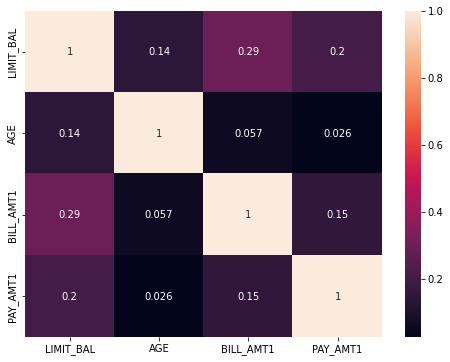

In [ ]:
corr_df = df1.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


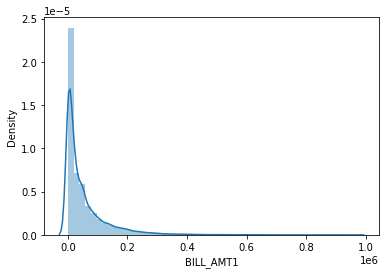

In [ ]:
sns.distplot(df['BILL_AMT1']) #Dinero que se debe en septiembre 

In [ ]:
print("Skewness: %f" % df['BILL_AMT1'].skew())
print("Kurtosis: %f" % df['BILL_AMT1'].kurt())

Skewness: 2.655231
Kurtosis: 9.735053


- De acuerdo a la gráfica anterior de la densidad de la variable "BILL_AMT1" y con referencia a la curtosis se reafirma la curva leptocúrtica presentada lo cual quiere decir que la mayoria de los individuos están muy concentrados en la media indicando que el dinero que ellos deben, la mayoria está alrededor de 52.013 dólares para el mes de septiembre. Se presenta un sesgo a la derecha lo cual significa que el promedio del monto del estado de cuenta supera de manera organizada el 50% de los individuos. (Asimetria positiva)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


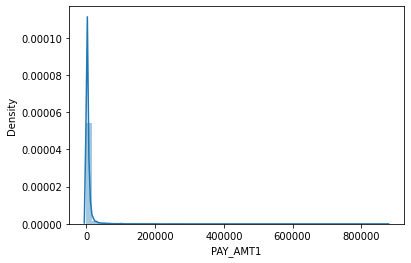

In [ ]:
sns.distplot(df['PAY_AMT1']) #Dinero que se debe en septiembre 

In [ ]:
print("Skewness: %f" % df['PAY_AMT1'].skew())
print("Kurtosis: %f" % df['PAY_AMT1'].kurt())

Skewness: 14.966261
Kurtosis: 443.912641


- De acuerdo a la gráfica anterior de la densidad de la variable "PAY_AMT1" y con referencia a la curtosis se reafirma la curva leptocúrtica presentada lo cual quiere decir que la mayoria de los individuos están muy concentrados en la media indicando que el dinero que ellos ya pagaron, la mayoria está alrededor de 5.586 dólares para el mes de septiembre. Se presenta un sesgo a la derecha lo cual significa que el 50% de los individuos está por debajo del promedio.

Diferencia de medias por sexo y Monto del estado de cuenta 

## Test de homocedasticidad

Hipótesis contrastadas

Las hipótesis contrastadas por el test de Levene son:

H0 : Presencia de homocedasticidad (varianzas iguales)

Ha : Presencia de heterocedasticidad (varianzas diferentes)

In [ ]:
pg.homoscedasticity(data= df, dv='BILL_AMT1', group='SEX')

W     pval  equal_var
levene  19.491655  0.00001      False

Se encontraron evidencias significativas (para alpha = 0.05) de que las varianzas sean distintas entre hombres y mujeres de acuerdo al monto que deben. 

Hipótesis contrastadas

Las hipótesis contrastadas por el t-test son:

H0 : No hay diferencias entre las medias:  μx=μy 

Ha : Sí hay diferencias entre las medias:  μx≠μy

In [ ]:
debe_hombres = df.loc[df.SEX == 1, 'BILL_AMT1']
debe_mujeres = df.loc[df.SEX == 2, 'BILL_AMT1']

In [ ]:
debe_mujeres.describe()

count     17498.000000
mean      49939.248771
std       71017.573571
min           0.000000
25%        3500.750000
50%       22397.500000
75%       67374.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

In [ ]:
pg.ttest(x=debe_hombres, y=debe_mujeres, alternative='two-sided')

T           dof alternative         p-val               CI95%  \
T-test  5.805966  23102.266745   two-sided  6.483381e-09  [3462.07, 6990.97]   

        cohen-d       BF10  power  
T-test  0.07094  2.775e+05    1.0

- Dado que p-value (0.000000006) es menor que el nivel de significancia alpha (0.05) , por lo tanto se rechaza la hipotesis nula, es decir que existe una diferencia real entre el monto promedio que deben las mujeres y el que deben los hombres. Por ende se puede concluir que los hombres deben más que las mujeres.

- Promedio monto del estado de cuenta hombres: 55.165 USD
- Promedio monto del estado de cuenta mujeres: 49.939 USD

In [ ]:
0.4*1000000

400000.0

In [ ]:
df2 = df.iloc[:, [0,4,11,17,23]] ; df2

LIMIT_BAL  AGE  BILL_AMT1  PAY_AMT1  default payment next month
0          20000   24       3913         0                           1
1         120000   26       2682         0                           1
2          90000   34      29239      1518                           0
3          50000   37      46990      2000                           0
4          50000   57       8617      2000                           0
...          ...  ...        ...       ...                         ...
29994      80000   34      72557      7000                           1
29995     220000   39     188948      8500                           0
29996     150000   43       1683      1837                           0
29997      30000   37       3565         0                           1
29999      50000   46      47929      2078                           1

[29013 rows x 5 columns]

In [ ]:
df3 = df.iloc[:, [0,2,4,11,17]] ; df3

LIMIT_BAL  EDUCATION  AGE  BILL_AMT1  PAY_AMT1
0          20000          2   24       3913         0
1         120000          2   26       2682         0
2          90000          2   34      29239      1518
3          50000          2   37      46990      2000
4          50000          2   57       8617      2000
...          ...        ...  ...        ...       ...
29994      80000          2   34      72557      7000
29995     220000          3   39     188948      8500
29996     150000          3   43       1683      1837
29997      30000          2   37       3565         0
29999      50000          2   46      47929      2078

[29013 rows x 5 columns]

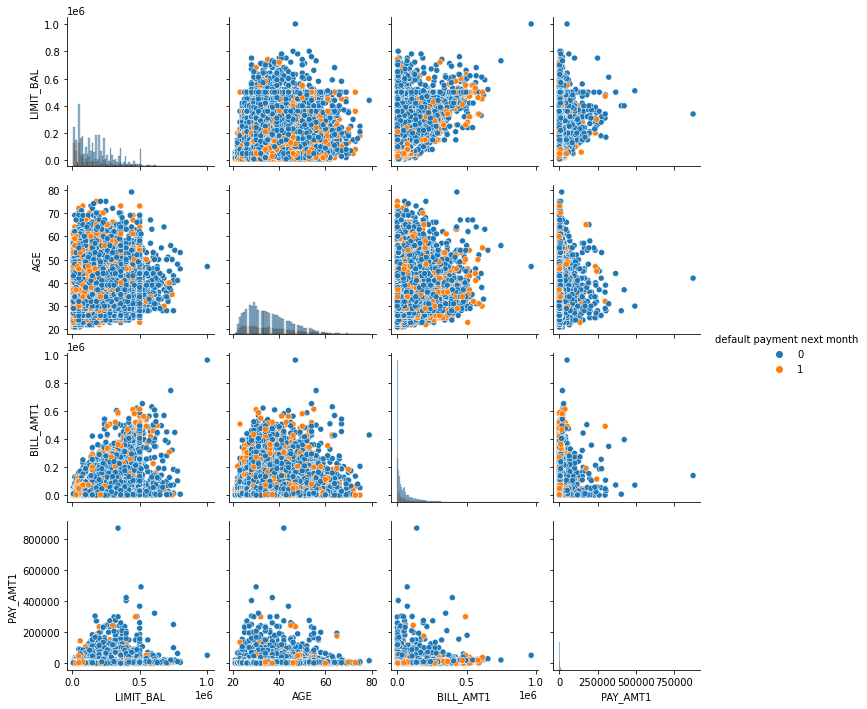

In [ ]:
sns.pairplot(df2, hue="default payment next month", diag_kind="hist")

- De acuerdo al gráfico anterior se puede decir que los hombres y mujeres que están entre los 35 y 50 años son aquellos que tienen un mayor nivel de deuda para pago de su tarjeta de credito para septiembre del 2005 y por ende también tienen un monto pagado más elevado con un monto ortorgado más alto.
- Por otro lado aquellos quienes tienen Monto del crédito otorgado entre los 400.000 USD y 600.000 USD tienen un monto pagado mayor igual que un monto de deuda mas grande.
- Finalmente aquellos que tienen un monto de credito otorgado de menor valor son quienes estan reportados por incumplimiento.

## LIMIT y Educacion

In [ ]:
from matplotlib import cm
explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
n = len(df['SEX'])
colors = [cm.terrain(i / n) for i in range(n)]

In [ ]:
df3 = df.iloc[:, [0,1,4,11,17,23]] ; df3

LIMIT_BAL  SEX  AGE  BILL_AMT1  PAY_AMT1  default payment next month
0          20000    2   24       3913         0                           1
1         120000    2   26       2682         0                           1
2          90000    2   34      29239      1518                           0
3          50000    2   37      46990      2000                           0
4          50000    1   57       8617      2000                           0
...          ...  ...  ...        ...       ...                         ...
29994      80000    1   34      72557      7000                           1
29995     220000    1   39     188948      8500                           0
29996     150000    1   43       1683      1837                           0
29997      30000    1   37       3565         0                           1
29999      50000    1   46      47929      2078                           1

[29013 rows x 6 columns]

In [ ]:
df3.groupby(["SEX", "default payment next month"]).mean() #Género (1 = masculino; 2 = femenino).

LIMIT_BAL        AGE     BILL_AMT1  \
SEX default payment next month                                           
1   0                           174730.910764  36.405589  56428.164098   
    1                           124894.529975  36.770131  51271.552324   
2   0                           179112.654656  34.729108  50590.041386   
    1                           131612.727767  34.816970  47493.068534   

                                   PAY_AMT1  
SEX default payment next month               
1   0                           6266.866490  
    1                           3395.586378  
2   0                           6204.225237  
    1                           3332.097906

Con respecto a la tabla anterior se puede decir lo siguiente:
- Aquellos que pertenecen al sexo masculino y no están reportados por tener incumplimientos en su pago tienen mayores promedios en el monto otorgado, Monto del estado de cuenta y Monto pagado a comparacion de aquellos que si estan reportados. Además de ello el rango de edad promedio es de 36 a 37 años de edad. Lo mismo ocurre para el genero femenino.
- Comparando ambos generos relacionando aquellos que si tienen reporte por incumplimiento, en promedio, el monto otorgado para las mujeres es mayor que el de los hombres, sin embargo, los hombres deben más que las mujeres y los montos pagados de ambos están en proporciones similares.

## Analisis de variables a traves de los meses

In [3]:
df = pd.read_excel(r"/content/tarjeta_credito.xls")
df = df.drop(['ID'], axis = 1)
df=df.query('EDUCATION != [0,5,6] & MARRIAGE != [0] & BILL_AMT1 >= 0')
df['SEX'] = df['SEX'].astype(str)
df['EDUCATION'] = df['EDUCATION'].astype(str)
df['MARRIAGE'] = df['MARRIAGE'].astype(str)
df['default payment next month'] = df['default payment next month'].astype(str)

Para tener una noción historica sobre el comportamiento de lso inviduos en los momentos de realizar sus pagos, se comparan los montos pagados desde septienmbre hasta abril justo al total de la deuda buscando una relación

Text(0.5, 1.0, 'Abril')

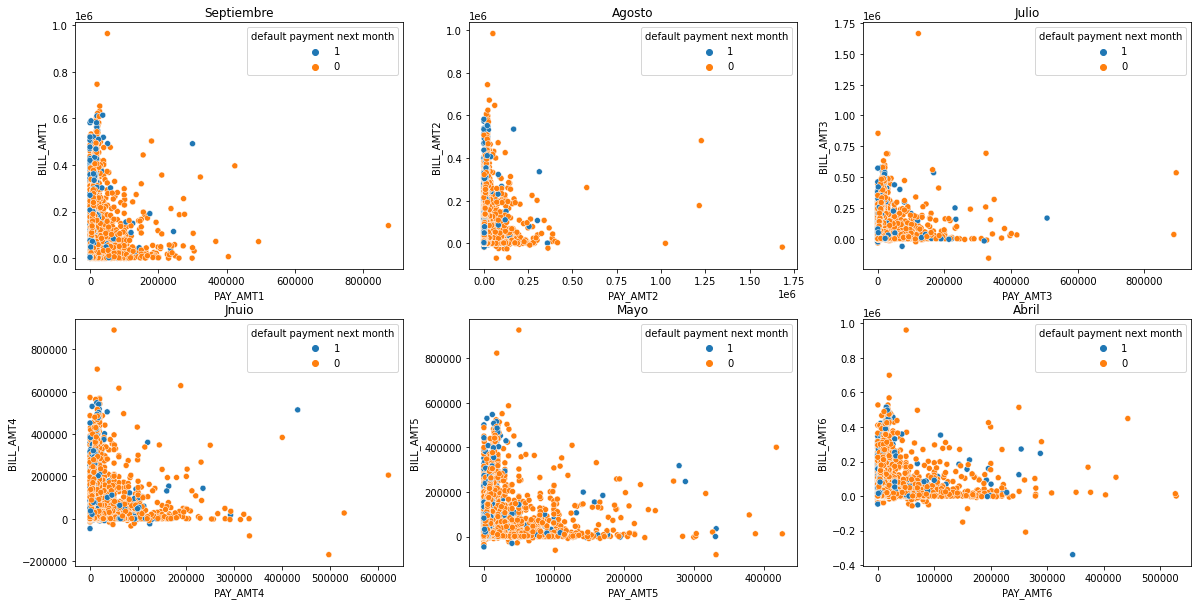

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
sns.scatterplot(data=df,  x="PAY_AMT1", y="BILL_AMT1",hue="default payment next month",  ax=axes[0,0])
axes[0,0].set_title("Septiembre")
sns.scatterplot(data=df,  x="PAY_AMT2", y="BILL_AMT2",hue="default payment next month", ax= axes[0,1])
axes[0,1].set_title("Agosto")
sns.scatterplot(data=df,  x="PAY_AMT3", y="BILL_AMT3",hue="default payment next month", ax=axes[0,2])
axes[0,2].set_title("Julio")
sns.scatterplot(data=df,  x="PAY_AMT4", y="BILL_AMT4",hue="default payment next month", ax=axes[1,0])
axes[1,0].set_title("Jnuio")
sns.scatterplot(data=df,  x="PAY_AMT5", y="BILL_AMT5",hue="default payment next month", ax=axes[1,1])
axes[1,1].set_title("Mayo")
sns.scatterplot(data=df,  x="PAY_AMT6", y="BILL_AMT6",hue="default payment next month", ax= axes[1,2])
axes[1,2].set_title("Abril")

- En la mayoria de los casos, sin importar el total de la deuda, las personas prefieren realizar sus pagos en transacciones que a duras penas llegan al minimo necesario para no generar "Default".
- Aquellos que deciden pagar de mas, son en su mayoria quienes no se encuentran en riesgo de "Default"

Text(0.5, 1.0, 'Abril')

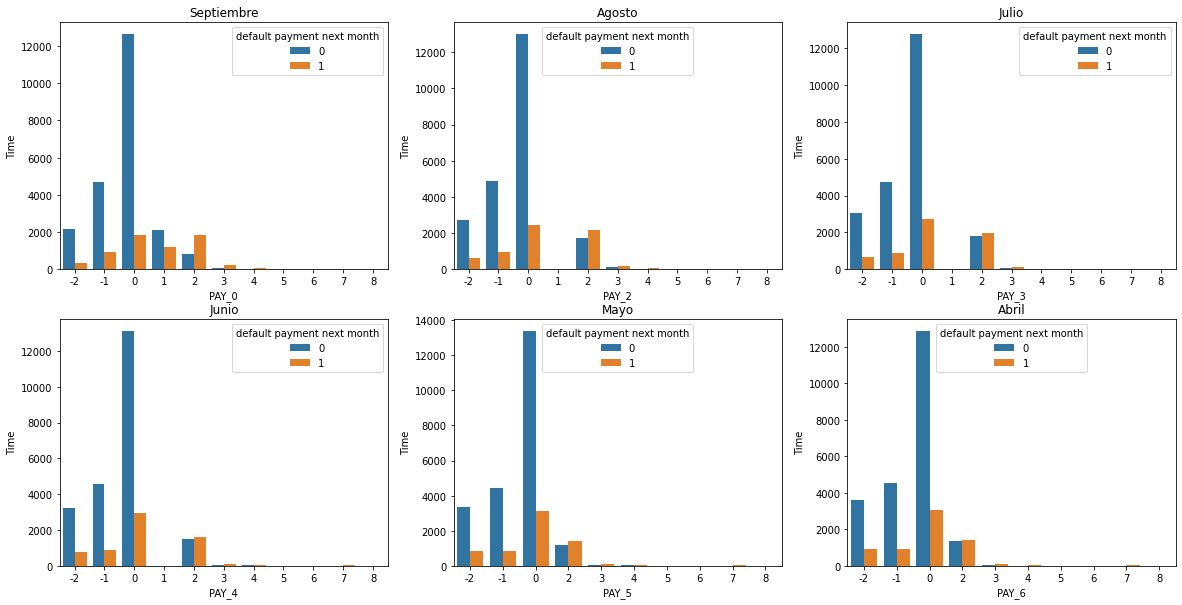

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
a=df.groupby(["default payment next month", "PAY_0"]).size().reset_index(name="Time")
sns.barplot(data=a,  x="PAY_0", y="Time", hue= "default payment next month",  ax=axes[0,0])
axes[0,0].set_title("Septiembre")
b=df.groupby(["default payment next month", "PAY_2"]).size().reset_index(name="Time")
sns.barplot(data=b,  x="PAY_2", y="Time", hue= "default payment next month",  ax=axes[0,1])
axes[0,1].set_title("Agosto")
c=df.groupby(["default payment next month", "PAY_3"]).size().reset_index(name="Time")
sns.barplot(data=c,  x="PAY_3", y="Time", hue= "default payment next month",  ax=axes[0,2])
axes[0,2].set_title("Julio")
d=df.groupby(["default payment next month", "PAY_4"]).size().reset_index(name="Time")
sns.barplot(data=d,  x="PAY_4", y="Time", hue= "default payment next month",  ax=axes[1,0])
axes[1,0].set_title("Junio")
e=df.groupby(["default payment next month", "PAY_5"]).size().reset_index(name="Time")
sns.barplot(data=e,  x="PAY_5", y="Time", hue= "default payment next month",  ax=axes[1,1])
axes[1,1].set_title("Mayo")
f=df.groupby(["default payment next month", "PAY_6"]).size().reset_index(name="Time")
sns.barplot(data=f,  x="PAY_6", y="Time", hue= "default payment next month",  ax=axes[1,2])
axes[1,2].set_title("Abril")

Las personas, tanto aquellos en posible "Default" como los que no, tienden a no realizar sus pagos el mes del corte, sino que les genere intereses al pagar las cuotas de la tarjeta. Aun asi, existe una proporción signficiativa de individuos que realizan sus pagos de manera correcta e incluso llegando a pagar de mas.

## MATRICES DE CORRELACIÓN
- Matriz entre los montos totales de cada mes (1)
- Matriz (1) adjuntando la edad
- Matriz entre los montos pagados de cada mes (2)
- Matriz (2) adjuntando la edad

In [6]:
corr = df.loc[:,['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].corr()
corr.style.background_gradient(cmap='coolwarm')

In [7]:
corr = df.loc[:,['AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].corr()
corr.style.background_gradient(cmap='coolwarm')

In [8]:
corr = df.loc[:,['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].corr()
corr.style.background_gradient(cmap='coolwarm')

In [9]:
corr = df.loc[:,['AGE','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].corr()
corr.style.background_gradient(cmap='coolwarm')

No existe una correlación fuerte entre los montos pagados cada mes, pero si entre los totales mensuales, sin embargo esto no puede tomarse encuenta siendo que existe dependencia entre estos datos.

## Pairplot de la edad y el cupo de la tarjeta junto a la cuenta final en los ultimos 3 meses

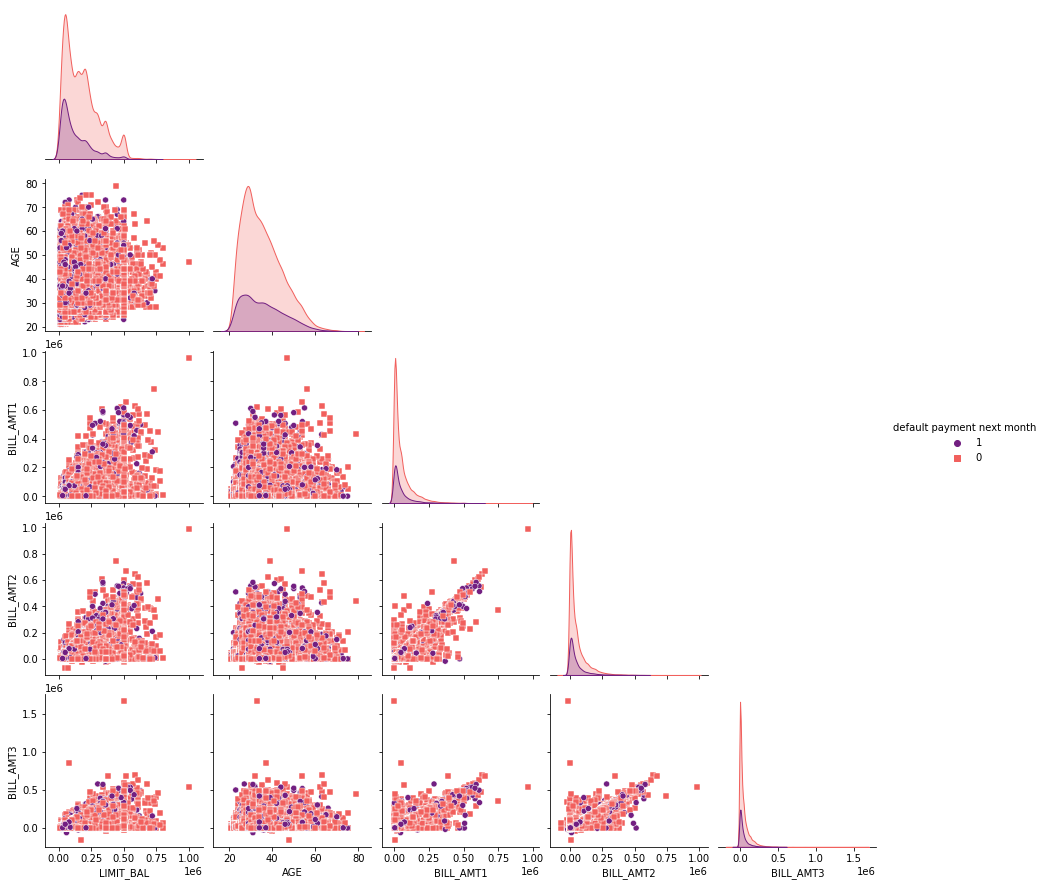

In [10]:
df_1=df.loc[:,['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','default payment next month']]
sns.pairplot(df_1, 
             hue="default payment next month", 
             markers=["o", "s"], 
             corner = True,
             palette = "magma" )

No se puede apreciar una relación entre la edad de los individuos y los estado de cuenta de los meses de Julio, Agosto y Septiembre. Lo mismo sucede con el cupo de la tarjeta.

## Selección de variables

Con respecto a la selección de variables, las variables sociodemograficas no difieren de manera signficativa con el cumplimiento de las responsabilidades financieras de cada individuo. Aun asi, sus correlaciones en la mayoria de casos superan el 20%, logrando tener cierta relevancia para una futura clasificación

# Referencias
default of credit card clients Data Set: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients